In [1]:
# Importamos Pandas para leer la data.
import pandas as pd

In [2]:
# Importamos la data descargada en el PC
data = pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# Separamos la data de BMI (IMC) de los pacientes que presentan problemas de enfermedades cardiacas
hd_pacientes = data["BMI"][data["HeartDisease"] == "Yes"]
hd_pacientes.count()

27373

In [4]:
# Describimos la data
hd_pacientes.describe()

count    27373.000000
mean        29.401592
std          6.577151
min         12.210000
25%         25.060000
50%         28.340000
75%         32.690000
max         83.330000
Name: BMI, dtype: float64

In [5]:
# Calculamos la media
hd_pacientes.mean()

29.401592079786653

In [6]:
# Calculamos la mediana
hd_pacientes.median()

28.34

In [7]:
# Calculamos la moda
hd_pacientes.mode()

0    26.63
Name: BMI, dtype: float64

In [8]:
# Importamos las librerías para realizar los gráficos básicos. 
import matplotlib
import matplotlib.pyplot as plt

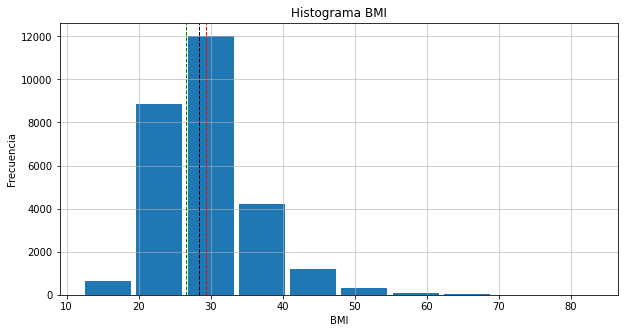

In [9]:
# Algunas configuraciones para la gráfica
plt.figure(figsize= (10,5))
plt.hist(hd_pacientes, bins=10, rwidth=0.9)
plt.title("Histograma BMI")
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.75)
plt.axvline(hd_pacientes.mean(), color='r', linestyle='dashed', linewidth=1) # La media
plt.axvline(hd_pacientes.median(), color='k', linestyle='dashed', linewidth=1)# La mediana
plt.axvline(26.63, color='g', linestyle='dashed', linewidth=1) # La moda

In [10]:
# Calculamos la varianza de la muestra
hd_pacientes.var() # Varianza de la muestra, divide entre N-1 por defecto

43.25891251706718

In [11]:
# Calculamos la varianza de la población
hd_pacientes.var(ddof=0) # Varianza de la poblacion, divide entre N-0

43.257332167360644

In [12]:
# Calculamos la desviación estándar
hd_pacientes.std(ddof=0) # Para obtener los mismos resultados que en numpy.std()

6.5770306497203315

In [13]:
# Calculamos el coeficiente de variación 
hd_pacientes.std(ddof=0)/ hd_pacientes.mean()

0.22369641180900487

In [14]:
# Calculamos la asimetría estadística
hd_pacientes.skew()

1.2262728589310081

In [15]:
#Importamos librerías adicionales para la elaboración del histograma avanzado. 
import numpy as np
import math as mth

In [16]:
def histo_frec(data, nombre):
    #Definimos variables globales, esta variable sera el dataframe que contendra la tabla de resultados del histrograma
    global matrix_frame_frec
    # Definimos la cantidad de elementos
    cant_elemt = data.count()
    # Definimos el numero de clases de manera estática
    k = 10

    # Definimos parametros basicos del histograma, tanto por puntos como por densidad de poblacion
    n, bins = np.histogram(data, bins=k)
    m, bins2 = np.histogram(data, bins=k, density=True)
    
    # Creamos variable para almacenar las clases
    clases=[]
    # Creamos variable para almacenar la tabla de resultados
    matrix =[]
    #Calculamos la probabilida de ocurrencia de los eventos
    prob =n/cant_elemt
    # Construimos el array de clases
    for i in range(0,k):
        par_val=(round(bins[i],4),round(bins[i+1],4))
        clases.append(par_val)
    # Construmios la tabla de datos almacenandola en la matrix
    for i in range(0,k):
        diccionario ={"Clases":clases[i],"# Puntos":n[i],"Probabilidad":round(prob[i],4), "Densidad":m[i]}
        matrix.append(diccionario)
    matrix_frame_frec = pd.DataFrame(matrix)
    
    #Construimos el histograma
    plt.hist(data, bins=k , density = True, rwidth=0.9)
    plt.title(nombre)
    plt.xlabel('Clases')
    plt.ylabel('Frecuencia')
    plt.grid(alpha=0.75)
    
    
    return plt.show(), matrix_frame_frec

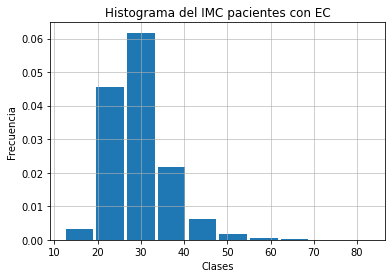

(None,
              Clases  # Puntos  Probabilidad  Densidad
 0   (12.21, 19.322)       655        0.0239  0.003365
 1  (19.322, 26.434)      8844        0.3231  0.045429
 2  (26.434, 33.546)     12017        0.4390  0.061728
 3  (33.546, 40.658)      4231        0.1546  0.021733
 4   (40.658, 47.77)      1187        0.0434  0.006097
 5   (47.77, 54.882)       319        0.0117  0.001639
 6  (54.882, 61.994)        76        0.0028  0.000390
 7  (61.994, 69.106)        30        0.0011  0.000154
 8  (69.106, 76.218)         8        0.0003  0.000041
 9   (76.218, 83.33)         6        0.0002  0.000031)

In [17]:
# Construimos el histograma de frecuencia del IMC para los pacientes que presentan enfermedades cardiacas (EC)
histo_frec(hd_pacientes,"Histograma del IMC pacientes con EC")

In [18]:
# Separamos la data de BMI (IMC) de los pacientes que NO presentan problemas de enfermedades cardiacas
nhd_pacientes = data["BMI"][data["HeartDisease"] == "No"]
nhd_pacientes.count()

292422

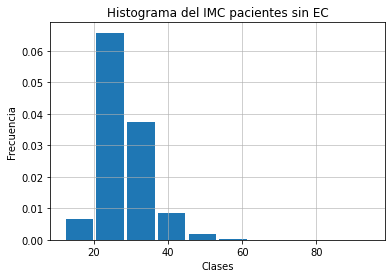

(None,
              Clases  # Puntos  Probabilidad  Densidad
 0   (12.02, 20.303)     16147        0.0552  0.006666
 1  (20.303, 28.586)    159186        0.5444  0.065721
 2  (28.586, 36.869)     90772        0.3104  0.037476
 3  (36.869, 45.152)     20785        0.0711  0.008581
 4  (45.152, 53.435)      4348        0.0149  0.001795
 5  (53.435, 61.718)       840        0.0029  0.000347
 6  (61.718, 70.001)       228        0.0008  0.000094
 7  (70.001, 78.284)        78        0.0003  0.000032
 8  (78.284, 86.567)        25        0.0001  0.000010
 9   (86.567, 94.85)        13        0.0000  0.000005)

In [19]:
#  Construimos el histograma de frecuencia del IMC para los pacientes que presentan enfermedades cardiacas (EC)
histo_frec(nhd_pacientes,"Histograma del IMC pacientes sin EC")

_Realizó:_

_Javier A. Ochoa M.  
Ing. Mecánico especialista en gestión de mantenimiento <br />
técnicas de mantenimiento predictivo y confiabilidad integral. <br />
+57-3213192915  
javier8am@yahoo.com
Bogotá – Colombia_  